# StandardScaler & MinMaxScaler – ML

StandardScaler follows Standard Normal Distribution (SND). 

Therefore, it makes mean = 0 and scales the data to unit variance. 

MinMaxScaler scales all the data features in the range [0, 1] or 

else in the range [-1, 1] if there are negative values in the dataset. 



**Min-Max Normalization**: This technique re-scales a feature or observation value with distribution value between 0 and 1.

image.png

**Standardization:** It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

image.png

In [46]:
import pandas as pd

In [47]:
seed_path = r"C:\Users\12489\Documents\Data\seed.csv"

df=pd.read_csv(seed_path)
df.head()

,3.312,5.763
0,3.333,5.554
1,3.337,5.291
2,3.379,5.324
3,3.562,5.658
4,3.312,5.386


In [48]:
from sklearn.preprocessing import StandardScaler

# instantiate the chosen scaler
s_scaler = StandardScaler()

# fit (any math that needs to happen)
s_scaler.fit(df)

# transform
samples_scaled = s_scaler.transform(df)

# print(samples_scaled)

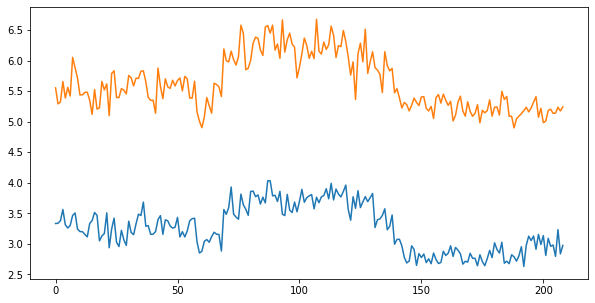

In [49]:
# Initialize original, scaled data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(df, label= "original")  

# Show legend and display plot plt.legend()
plt.show()

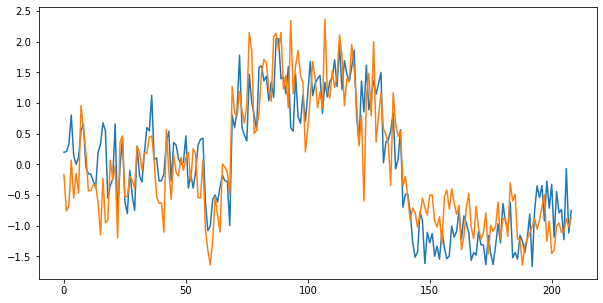

In [50]:
plt.figure(figsize=(10, 5))

plt.plot(samples_scaled, label='scaled')

plt.show()

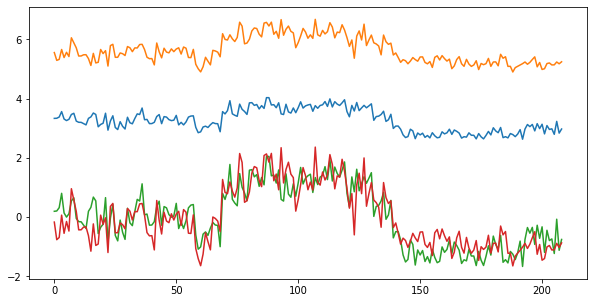

In [51]:
plt.figure(figsize=(10, 5))

plt.plot(df, label= "original")  
plt.plot(samples_scaled, label='scaled')

plt.show()

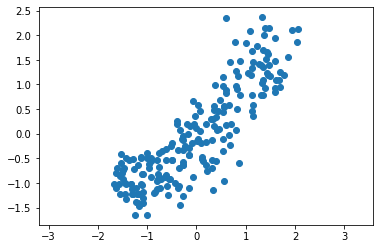

In [52]:
# BUT... IS IT CORRELATED??? 
# First, let's take a look via graphing

# Remember = scatter plots & regression

############################################

# Assign the 0th column of grains: width
width = samples_scaled[:,0]

# Assign the 1st column of grains: length
length = samples_scaled[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [53]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

0.8604405325922294


In [54]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range =(0, 1))

min_max_scaler.fit(df)

samples_scaled = min_max_scaler.transform(df)

# print(samples_scaled)

# print(df)

## **Decorrelating Data**

"Principal Component Analysis", or "PCA" for short. PCA performs dimension reduction in two steps, 

and **the first one, called "de-correlation", doesn't change the dimension of the data at all. **

**Second Step reduces dimension**

**PCA aligns data with axes**

Rotates data samples to be aligned with axes

Shifts data samples so they have mean 0

No information is lost

Single Value Decompostion

EIgen Values

Pythogoras theorem 

**PCA follows the fit/transform pattern**

The fit method learns how to shift and how to rotate the samples, but doesn't actually change them. 

The transform method, on the other hand, applies the transformation that fit learned. 

In particular, the transform method can be applied to new, unseen samples

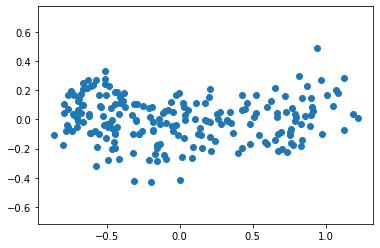

In [55]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model_pca = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model_pca.fit_transform(df)

# Assign 0th column of pca_features: xs
xs = pca_features[:, 0]

# Assign 1st column of pca_features: ys
ys = pca_features[:, 1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [56]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

-1.0158974356189177e-16


# **RobustScaler techniques**

In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. 

This leads to the shrinkage in the range of the feature values. 

By using RobustScaler(), we can remove the outliers and then use either 
StandardScaler or MinMaxScaler for preprocessing the dataset. 

RobustScaler uses the interquartile range so that it is robust to outlier

This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range

In [57]:
# Importing libraries
import numpy as np
from sklearn import preprocessing
import seaborn as sns 


# data
x = pd.DataFrame({
	# Distribution with lower outliers
	'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
	# Distribution with higher outliers
	'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})

#apply different scalers
r_scaler = preprocessing.RobustScaler()
robust_df = r_scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1', 'x2'])

#apply standard scaler
# (already imported)

standard_df = s_scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1', 'x2'])

#apply minmax
mm_scale = preprocessing.MinMaxScaler()
mm_df = mm_scale.fit_transform(x)
mm_df = pd.DataFrame(mm_df, columns=['x1', 'x2'])

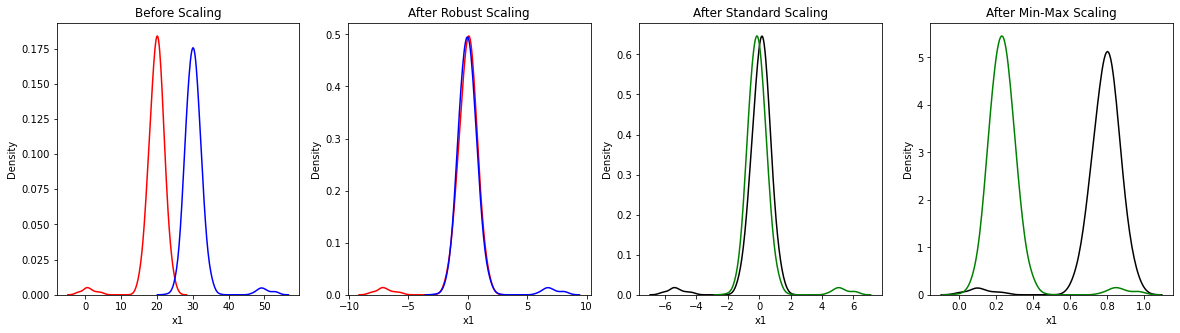

In [58]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')

ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')

ax3.set_title('After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')

ax4.set_title('After Min-Max Scaling')
sns.kdeplot(mm_df['x1'], ax = ax4, color ='black')
sns.kdeplot(mm_df['x2'], ax = ax4, color ='g')

plt.show()

## **Why and Where to Apply Feature Scaling?**

Formally, If a feature in the dataset is big in scale compared to others then in algorithms where Euclidean distance is measured this big scaled feature becomes dominating and needs to be normalized. 

Examples of Algorithms where Feature Scaling matters 

1. K-Means uses the Euclidean distance measure here feature scaling matters. 

2. K-Nearest-Neighbours also require feature scaling. 

3. Principal Component Analysis (PCA): Tries to get the feature with maximum variance, here too feature scaling is required. 

Gradient Descent Based algorithms (Linear and Logistic Regression, Neural Network)

Note: Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling. 

In Short, any Algorithm which is Not Distance-based is Not affected by Feature Scaling.

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()

digits.data.shape

# 1797 images
# 8x8 photos (8*8 = 64)

(1797, 64)

In [60]:
type(digits)

sklearn.utils.Bunch

In [61]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two

In [62]:
from sklearn.decomposition import PCA
# project from 64 to 2 dimensions

pca = PCA(2) # <-- reduce to two dimensions/features
projected = pca.fit_transform(digits.data)

projected.shape # <-- see? only two now

(1797, 2)

We can now plot the first two principal components of each point to learn about the data:

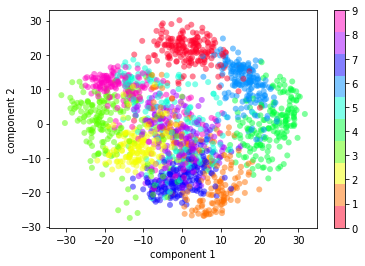

In [63]:
# plot a scatter

plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolors='none', alpha=0.5, cmap=plt.cm.get_cmap('gist_rainbow',10))
# c = color (color based on target)

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

 ^ if red, probably 0 ... if yellow, probably 2 ^

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

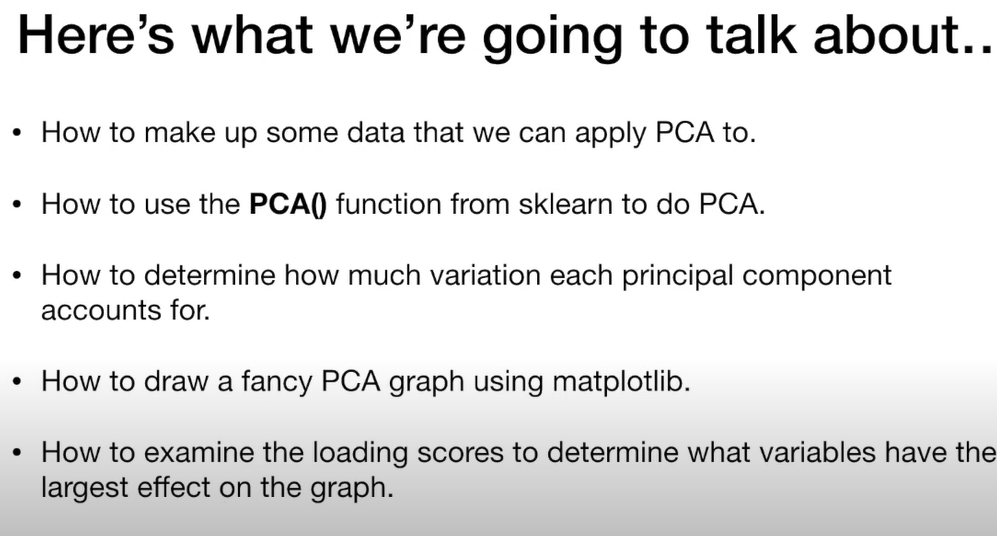